<h1><center><span style="color:Green"> Geely Auto case study (car price prediction using regression) </span></center></h1>



<span style="color:blue">Load the data from CSV file.</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# read the input CSV file
auto_df = pd.read_csv('./CarPrice_Assignment.csv')
auto_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
auto_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data cleaning

In [5]:
# extract the car brand name from the carName.
# if there is hyphen in carName replace with space
auto_df["CarName"] = auto_df["CarName"].str.replace('-', ' ')
auto_df.CarName.unique()

array(['alfa romero giulia', 'alfa romero stelvio',
       'alfa romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU X', 'isuzu D Max ',
       'isuzu D Max V Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx 4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx 7 gs',
       'mazda glc 

In [6]:
auto_df["CarName"] = auto_df.CarName.map(lambda x: x.split(" ", 1)[0])
# Fix the spelling errors in car brand names
auto_df.CarName = auto_df['CarName'].str.lower()
auto_df['CarName'] = auto_df['CarName'].str.replace('toyouta','toyota')
auto_df['CarName'] = auto_df['CarName'].str.replace('porcshce','porsche')
auto_df['CarName'] = auto_df['CarName'].str.replace('vw','volkswagen')
auto_df['CarName'] = auto_df['CarName'].str.replace('vokswagen','volkswagen')
auto_df['CarName'] = auto_df['CarName'].str.replace('maxda','mazda')
#auto_df['CarName'] = auto_df['CarName'].str.replace('maxda','mazda')

auto_df.CarName.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

## Handling NaN data

In [7]:
 #find the fields with NaN or missing values in dataframe
round(100*(auto_df.isnull().sum()/len(auto_df.index)), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

There are no nulls in any of the columns in the database

## Drop all columns with single value

In [8]:
# Find out how many columns have single value
single_value_columns = auto_df.nunique()
single_value_columns = single_value_columns[single_value_columns.values==1]
single_value_columns

Series([], dtype: int64)

There are no columns with single value

## Check for duplicate columns (columns with exactly same values)

In [9]:
# Check for duplicate columns
auto_df = auto_df.loc[:, ~auto_df.columns.duplicated()]
auto_df.shape

(205, 26)

There are no duplicate columns

## Check for outliers 

Text(0,0.5,'price')

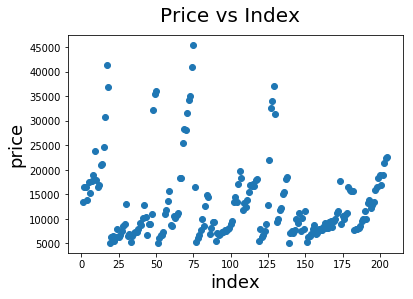

In [10]:
# Plot price
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.scatter(c,auto_df['price'])
fig.suptitle('Price vs Index', fontsize=20)              
plt.xlabel('index', fontsize=18)                          
plt.ylabel('price', fontsize=18)  

In [11]:
auto_df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<span style="color:Green">Although there are outliers in the price, let us not eliminate them. The input data has a wide price range of cars and we might lose on some valuable information if we delete outliers.</span>



# Exploratory Data Analysis

## Univariate analysis

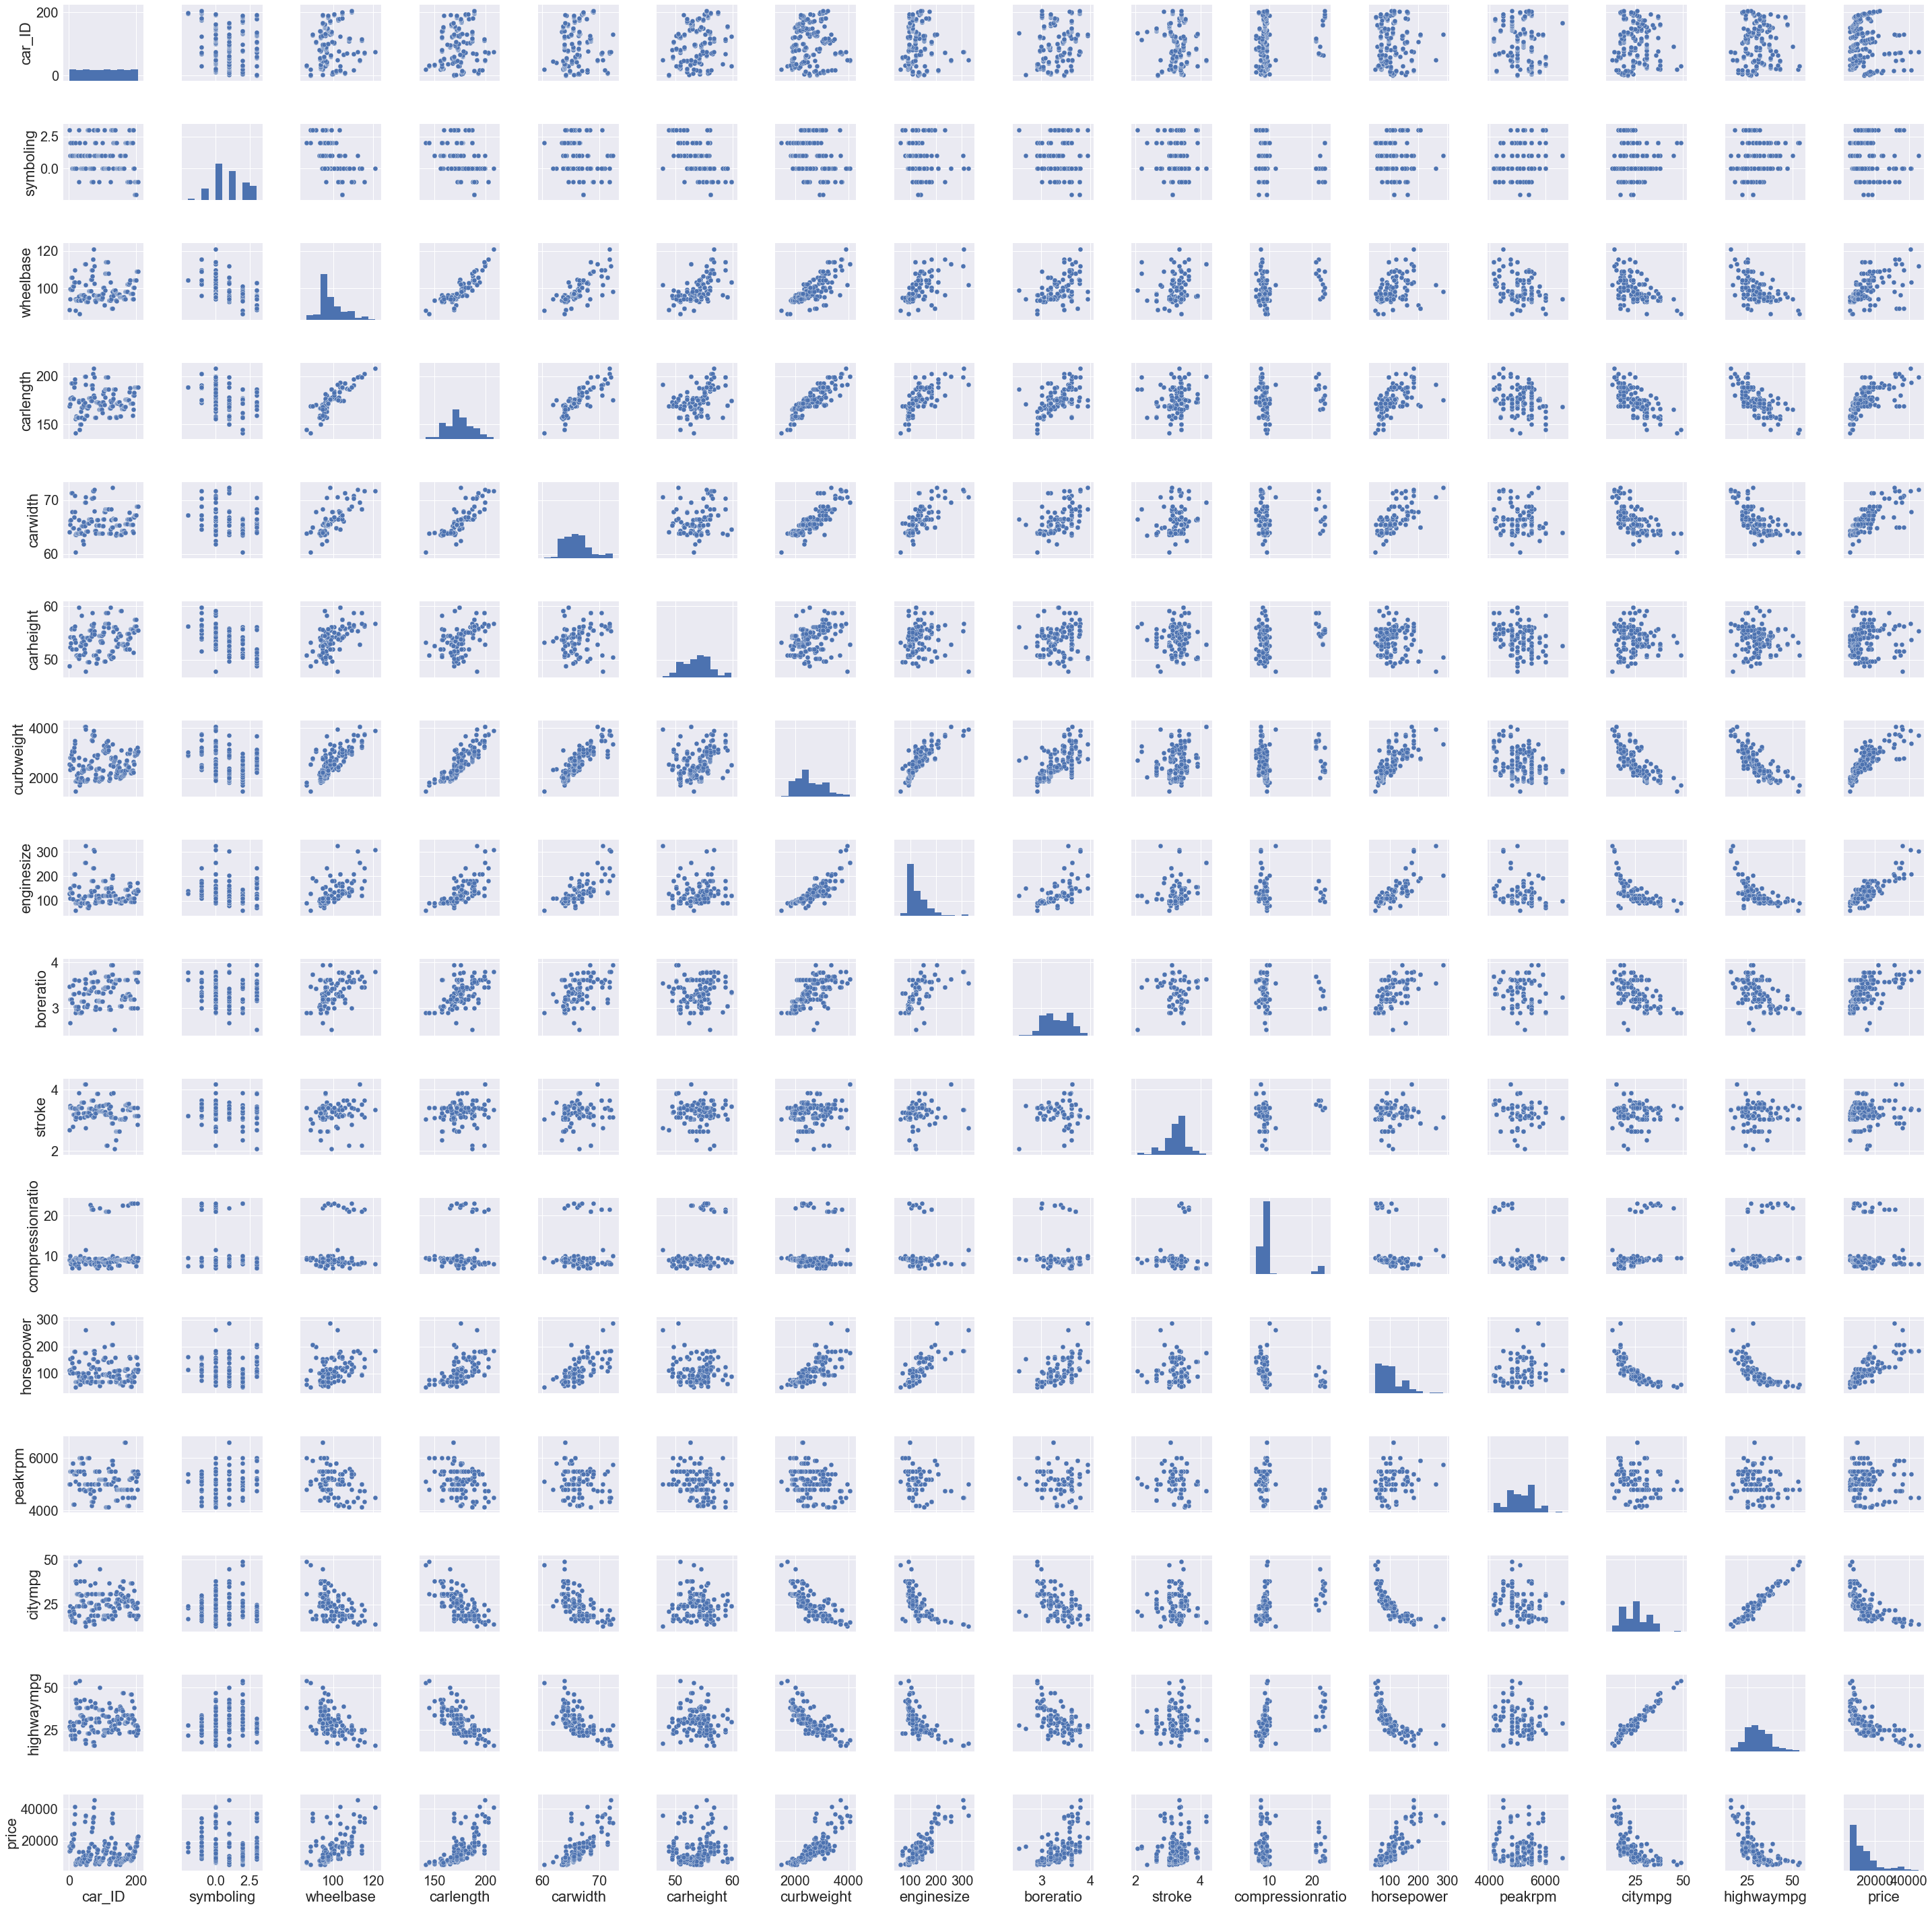

In [12]:
#Plot pairs of all variables in the dataframe
sns.set(font_scale=2)
sns.pairplot(auto_df)

## Correlation matrix (multivariate analysis)

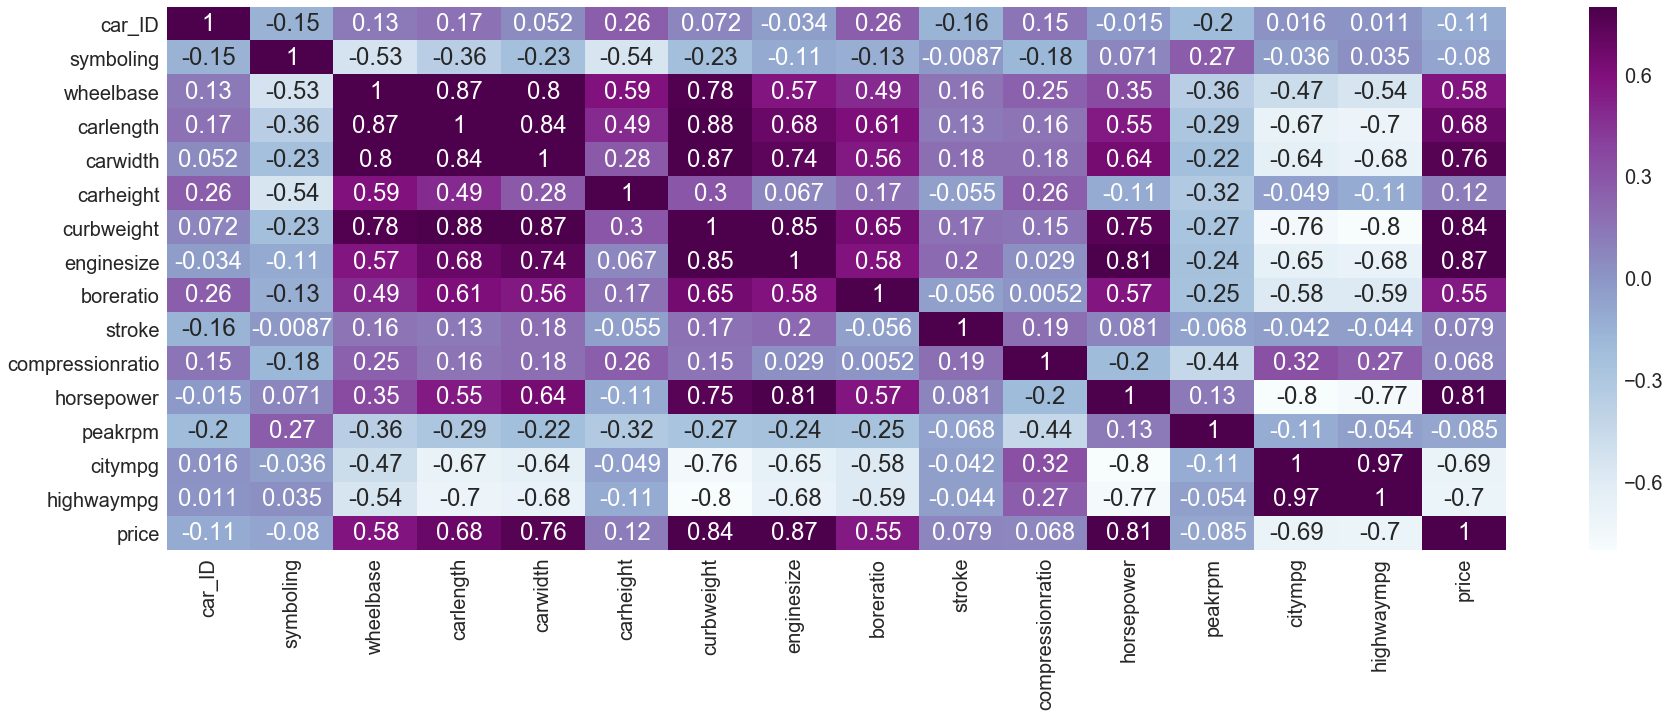

In [13]:
plt.figure(figsize = (30,10))  
sns.heatmap(auto_df.corr(), vmax=.8, annot = True, cmap="BuPu");


<span style="color:Green">Highwaympg and Citympg are highly correlated at 0.97. Create a new column with a ratio of the two.</span>

<span style="color:Green">Carlength and Carwidth are highly correlated at 0.87. Create a new column with a ratio of the two.</span>

<span style="color:Green">Carlength and Curbweight are highly correlated at 0.88. Create a new column with a ratio of the two.</span>

<span style="color:Green">Carlength and Wheelbase are highly correlated at 0.87. Create a new column with a ratio of the two.</span>




In [14]:
#create derived metrics based on the correlation matrix
auto_df['carWLratio'] = auto_df['carwidth']/auto_df['carlength']
auto_df['carCWLratio'] = auto_df['curbweight']/auto_df['carlength']
auto_df['carWBLratio'] = auto_df['wheelbase']/auto_df['carlength']
auto_df['hpengsizeratio'] = auto_df['horsepower']/auto_df['enginesize']
auto_df['mpgratio'] = auto_df['citympg']/auto_df['highwaympg']

In [15]:
#drop carID,it is only a serial number 
auto_df.drop(["car_ID"], axis =1, inplace = True)

In [16]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

# Working with categorical variables

### Convert categorical variables of two levels to binary

In [17]:
# Convert gas to 1 and diesel to 0
auto_df['fueltype'] = auto_df['fueltype'].map({'gas': 1, 'diesel': 0})


In [18]:
# Convert std aspiration to 1 and turbo to 0
auto_df['aspiration'] = auto_df['aspiration'].map({'std': 1, 'turbo': 0})


In [19]:
# convert 2 door to 1 and four door to 0
auto_df['doornumber'] = auto_df['doornumber'].map({'two': 1, 'four': 0})


In [20]:
# convert front engine to 1 and rear engine to 0
auto_df['enginelocation'] = auto_df['enginelocation'].map({'front': 1, 'rear': 0})

In [21]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg          

### For categorical columns with more than 2 levels, create dummy variables

<span style="color:Red">Categorical variables with more than 2 levels are - carBody, carName, cylindernumber,driveWheel, engineType,fuelsystem. Dummy variables should be created for these columns.</span>



In [22]:
auto_df= pd.get_dummies(auto_df)
auto_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


# Working with numeric columns

<span style="color:Red">Some of the numeric columns have a wide range of values and need to be normalized.</span>


In [23]:
# Create a function to normalize variables

norm_cols = ['boreratio', 'carlength', 'carheight', 'citympg', 'compressionratio','enginesize','horsepower', 'price',
          'peakrpm', 'stroke','symboling','carWLratio','carWBLratio','carCWLratio','mpgratio','hpengsizeratio']
 
norm_df = auto_df[norm_cols].apply(lambda x: (x-np.mean(x))/ (max(x) - min(x)))
norm_df.head()

,boreratio,carlength,carheight,citympg,compressionratio,enginesize,horsepower,price,peakrpm,stroke,symboling,carWLratio,carWBLratio,carCWLratio,mpgratio,hpengsizeratio
0,0.100174,-0.078347,-0.410407,-0.117209,-0.071409,0.011671,0.028679,0.005419,-0.051070,-0.274007,0.433171,-0.001156,-0.425970,0.051857,-0.096453,0.026744
1,0.100174,-0.078347,-0.410407,-0.117209,-0.071409,0.011671,0.028679,0.080018,-0.051070,-0.274007,0.433171,-0.001156,-0.425970,0.051857,-0.096453,0.026744
2,-0.464111,-0.042526,-0.110407,-0.172764,-0.071409,0.094689,0.207846,0.080018,-0.051070,0.102184,0.033171,0.027963,-0.159258,0.190504,-0.216111,0.161936
3,-0.099826,0.038071,0.047927,-0.033875,-0.008909,-0.067575,-0.008821,0.016714,0.153011,0.068850,0.233171,-0.050952,-0.030029,-0.133192,-0.039887,0.096273
4,-0.099826,0.038071,0.047927,-0.200542,-0.133909,0.034312,0.045346,0.103602,0.153011,0.068850,0.233171,-0.039398,-0.052316,0.140944,0.006394,0.019736


In [24]:
# normalize each numeric column, including the derived columns
auto_df['boreratio'] = norm_df['boreratio']
auto_df['carlength'] = norm_df['carlength']
auto_df['carheight'] = norm_df['carheight']
auto_df['compressionratio'] = norm_df['compressionratio']
auto_df['citympg'] = norm_df['citympg']
auto_df['enginesize'] = norm_df['enginesize']
auto_df['horsepower'] = norm_df['horsepower']
auto_df['peakrpm']= norm_df['peakrpm']
auto_df['price'] = norm_df['price']
auto_df['stroke'] = norm_df['stroke']
auto_df['symboling'] = norm_df['symboling']
auto_df['carWLratio'] = norm_df['carWLratio']
auto_df['carWBLratio'] = norm_df['carWBLratio']
auto_df['carCWLratio'] = norm_df['carCWLratio']
auto_df['mpgratio'] = norm_df['mpgratio']
auto_df['hpengsizeratio'] = norm_df['hpengsizeratio']

auto_df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.433171,1,1,1,1,88.6,-0.078347,64.1,-0.410407,2548,...,0,0,0,0,0,0,0,1,0,0
1,0.433171,1,1,1,1,88.6,-0.078347,64.1,-0.410407,2548,...,0,0,0,0,0,0,0,1,0,0
2,0.033171,1,1,1,1,94.5,-0.042526,65.5,-0.110407,2823,...,0,0,0,0,0,0,0,1,0,0
3,0.233171,1,1,0,1,99.8,0.038071,66.2,0.047927,2337,...,0,0,0,0,0,0,0,1,0,0
4,0.233171,1,1,0,1,99.4,0.038071,66.4,0.047927,2824,...,0,0,0,0,0,0,0,1,0,0


# Split data into training dataset and test dataset

In [25]:
# get the columns from the dataframe
df_columns = auto_df.columns
df_columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carWLratio',
       'carCWLratio', 'carWBLratio', 'hpengsizeratio', 'mpgratio',
       'CarName_alfa', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', '

In [26]:
# all columns except price (target variable) are loaded into X dataset
X = auto_df[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg','carWLratio',
       'carCWLratio', 'carWBLratio', 'hpengsizeratio', 'mpgratio',
       'CarName_alfa', 'CarName_audi', 'CarName_bmw', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi']]

In [27]:
# dependent variable (target variable) is price of the car
y = auto_df['price']

In [28]:
#use train_test_split to split the data.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 75 columns):
symboling                143 non-null float64
fueltype                 143 non-null int64
aspiration               143 non-null int64
doornumber               143 non-null int64
enginelocation           143 non-null int64
wheelbase                143 non-null float64
carlength                143 non-null float64
carwidth                 143 non-null float64
carheight                143 non-null float64
curbweight               143 non-null int64
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
compressionratio         143 non-null float64
horsepower               143 non-null float64
peakrpm                  143 non-null float64
citympg                  143 non-null float64
highwaympg               143 non-null int64
carWLratio               143 non-null float64
carCWLratio              143 non-

C:\Users\bindus\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Use RFE to reduce the number of features in training dataset

In [29]:
# RFE and LinearRegression are imported from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
rfe = RFE(lm,25)             
rfe = rfe.fit(X_train, y_train)
# Print the results of RFE - boolean and ranking
print(rfe.support_)           
print(rfe.ranking_)  

[False False  True False  True False  True False False False  True  True
  True False  True  True False False  True  True  True  True False False
 False  True False False False False False False False False  True False
  True False  True False  True False False False False  True False False
 False False False False False False False False False False False  True
  True False  True  True  True  True  True False False False False False
 False False False]
[25  3  1 38  1 31  1 30  2 47  1  1  1  5  1  1 34 43  1  1  1  1 21 29
 16  1 14 20  7 12 48 22 40 49  1 41  1  6  1 15  1 18 39 46  8  1 35 24
 36 45 44 42 27 10 33 32 11 19  9  1  1 28  1  1  1  1  1 26 37 13  4 50
 23 17 51]


In [30]:
X_train.columns[rfe.support_]

Index(['aspiration', 'enginelocation', 'carlength', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'carWLratio', 'carCWLratio',
       'carWBLratio', 'hpengsizeratio', 'CarName_bmw', 'CarName_mitsubishi',
       'CarName_peugeot', 'CarName_porsche', 'CarName_saab',
       'carbody_convertible', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [31]:
#variables dropped by RFE
X_train.columns
col_dropped = X_train.columns[~rfe.support_]
col_dropped

Index(['symboling', 'fueltype', 'doornumber', 'wheelbase', 'carwidth',
       'carheight', 'curbweight', 'compressionratio', 'citympg', 'highwaympg',
       'mpgratio', 'CarName_alfa', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury', 'CarName_nissan',
       'CarName_plymouth', 'CarName_renault', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [32]:
# variables remaining in dataset after RFE 
X_train1 = X_train.drop(col_dropped,1)
X_train1.columns

Index(['aspiration', 'enginelocation', 'carlength', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'carWLratio', 'carCWLratio',
       'carWBLratio', 'hpengsizeratio', 'CarName_bmw', 'CarName_mitsubishi',
       'CarName_peugeot', 'CarName_porsche', 'CarName_saab',
       'carbody_convertible', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

# Model building 

In [33]:
#Build a linear regression model
import statsmodels.api as sm  
X_train1 = sm.add_constant(X_train1)

In [34]:
model_1 = sm.OLS(y_train,X_train1).fit() 
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.13e-70
Time:                        20:15:57   Log-Likelihood:                 260.53
No. Observations:                 143   AIC:                            -471.1
Df Residuals:                     118   BIC:                            -397.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

 <span style="color:Green">There are several variables with high p-value ( > 0.05). So let us check the VIF.</span>


In [35]:
# function to calculate VIF for a dataset and a target variable
def calculate_vif(in_data, target_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=in_data.drop([target_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [36]:
# drop the columns picked by RFE from the dataset
auto_df.drop(col_dropped, axis =1, inplace = True)
auto_df.head()

,aspiration,enginelocation,carlength,enginesize,boreratio,stroke,horsepower,peakrpm,price,carWLratio,...,CarName_porsche,CarName_saab,carbody_convertible,enginetype_rotor,cylindernumber_eight,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,1,-0.078347,0.011671,0.100174,-0.274007,0.028679,-0.051070,0.005419,-0.001156,...,0,0,1,0,0,1,0,0,0,0
1,1,1,-0.078347,0.011671,0.100174,-0.274007,0.028679,-0.051070,0.080018,-0.001156,...,0,0,1,0,0,1,0,0,0,0
2,1,1,-0.042526,0.094689,-0.464111,0.102184,0.207846,-0.051070,0.080018,0.027963,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0.038071,-0.067575,-0.099826,0.068850,-0.008821,0.153011,0.016714,-0.050952,...,0,0,0,0,0,1,0,0,0,0
4,1,1,0.038071,0.034312,-0.099826,0.068850,0.045346,0.153011,0.103602,-0.039398,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Calculating Vif value
calculate_vif(in_data=auto_df, target_col="price")

C:\Users\bindus\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
24,cylindernumber_two,inf
18,enginetype_rotor,inf
6,horsepower,99.420000
3,enginesize,52.390000
11,hpengsizeratio,41.330000
1,enginelocation,40.390000
20,cylindernumber_four,33.040000
2,carlength,24.410000
8,carWLratio,16.980000
0,aspiration,14.580000


In [38]:
# VIF for cylindernumber_two and enginetype_rotor is infinity. Check the correlation between these variables
auto_df['cylindernumber_two'].corr(auto_df['enginetype_rotor'])

1.0

<span style="color:Green">The cylindernumber_two and enginetype_rotor are highly correlated and the value is 1. So let us drop one of them - cylindernumber_two.</span>


In [39]:
# Drop highly correlated variable
X_train2 = X_train1.drop('enginetype_rotor', 1)

In [40]:
# Second model - after dropping enginetype_rotor
model_2 = sm.OLS(y_train,X_train2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.13e-70
Time:                        20:15:59   Log-Likelihood:                 260.53
No. Observations:                 143   AIC:                            -471.1
Df Residuals:                     118   BIC:                            -397.0
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [41]:
# drop the variable from the dataframe
auto_df.drop('enginetype_rotor', axis =1, inplace = True)

In [42]:
# calcualte VIF for the updated dataframe
calculate_vif(in_data= auto_df, target_col="price")

,Var,Vif
6,horsepower,99.42
3,enginesize,52.39
11,hpengsizeratio,41.33
1,enginelocation,40.39
19,cylindernumber_four,33.04
2,carlength,24.41
8,carWLratio,16.98
0,aspiration,14.58
9,carCWLratio,9.19
20,cylindernumber_six,7.03


<span style="color:Green">'horsepower' has a high p-value as well as very high VIF. So let us drop it.</span>

In [43]:
# Drop variable with high p-value and high VIF
X_train3 = X_train2.drop('horsepower', 1)

In [44]:
# Third model - after dropping horsepower
model_3 = sm.OLS(y_train,X_train3).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     118.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           6.20e-71
Time:                        20:16:00   Log-Likelihood:                 259.10
No. Observations:                 143   AIC:                            -470.2
Df Residuals:                     119   BIC:                            -399.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.27

In [45]:
# drop the variable from the dataframe
auto_df.drop('horsepower', axis =1, inplace = True)

In [46]:
 #Find VIF values for updated dataframe
calculate_vif(in_data=auto_df, target_col="price")

,Var,Vif
1,enginelocation,40.31
18,cylindernumber_four,32.66
2,carlength,24.01
3,enginesize,21.83
7,carWLratio,16.17
0,aspiration,14.13
8,carCWLratio,8.85
19,cylindernumber_six,6.15
10,hpengsizeratio,4.82
4,boreratio,4.76


<span style="color:Green">'hpengsizeratio' has very high p-value.So let us drop it.</span>

In [47]:
# drop variable with high p-value 
X_train4 = X_train3.drop('hpengsizeratio', 1)

In [48]:
# Fourth model - after dropping hpengsizeratio
model_4 = sm.OLS(y_train,X_train4).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           9.12e-72
Time:                        20:16:01   Log-Likelihood:                 258.49
No. Observations:                 143   AIC:                            -471.0
Df Residuals:                     120   BIC:                            -402.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [49]:
# drop the variable from the dataframe
auto_df.drop('hpengsizeratio', axis =1, inplace = True)

In [50]:
# calculate vif for updated dataframe
calculate_vif(in_data=auto_df, target_col="price")

,Var,Vif
1,enginelocation,37.88
17,cylindernumber_four,32.64
2,carlength,23.98
3,enginesize,20.99
7,carWLratio,16.16
0,aspiration,9.92
8,carCWLratio,8.66
18,cylindernumber_six,5.84
4,boreratio,4.48
16,cylindernumber_eight,3.77


<span style="color:Green">It is not very clear which variable to drop just using p-value and VIF.There are multiple variables with high p-values but either high or low VIF. So let us plot the correlation matrix.</span>

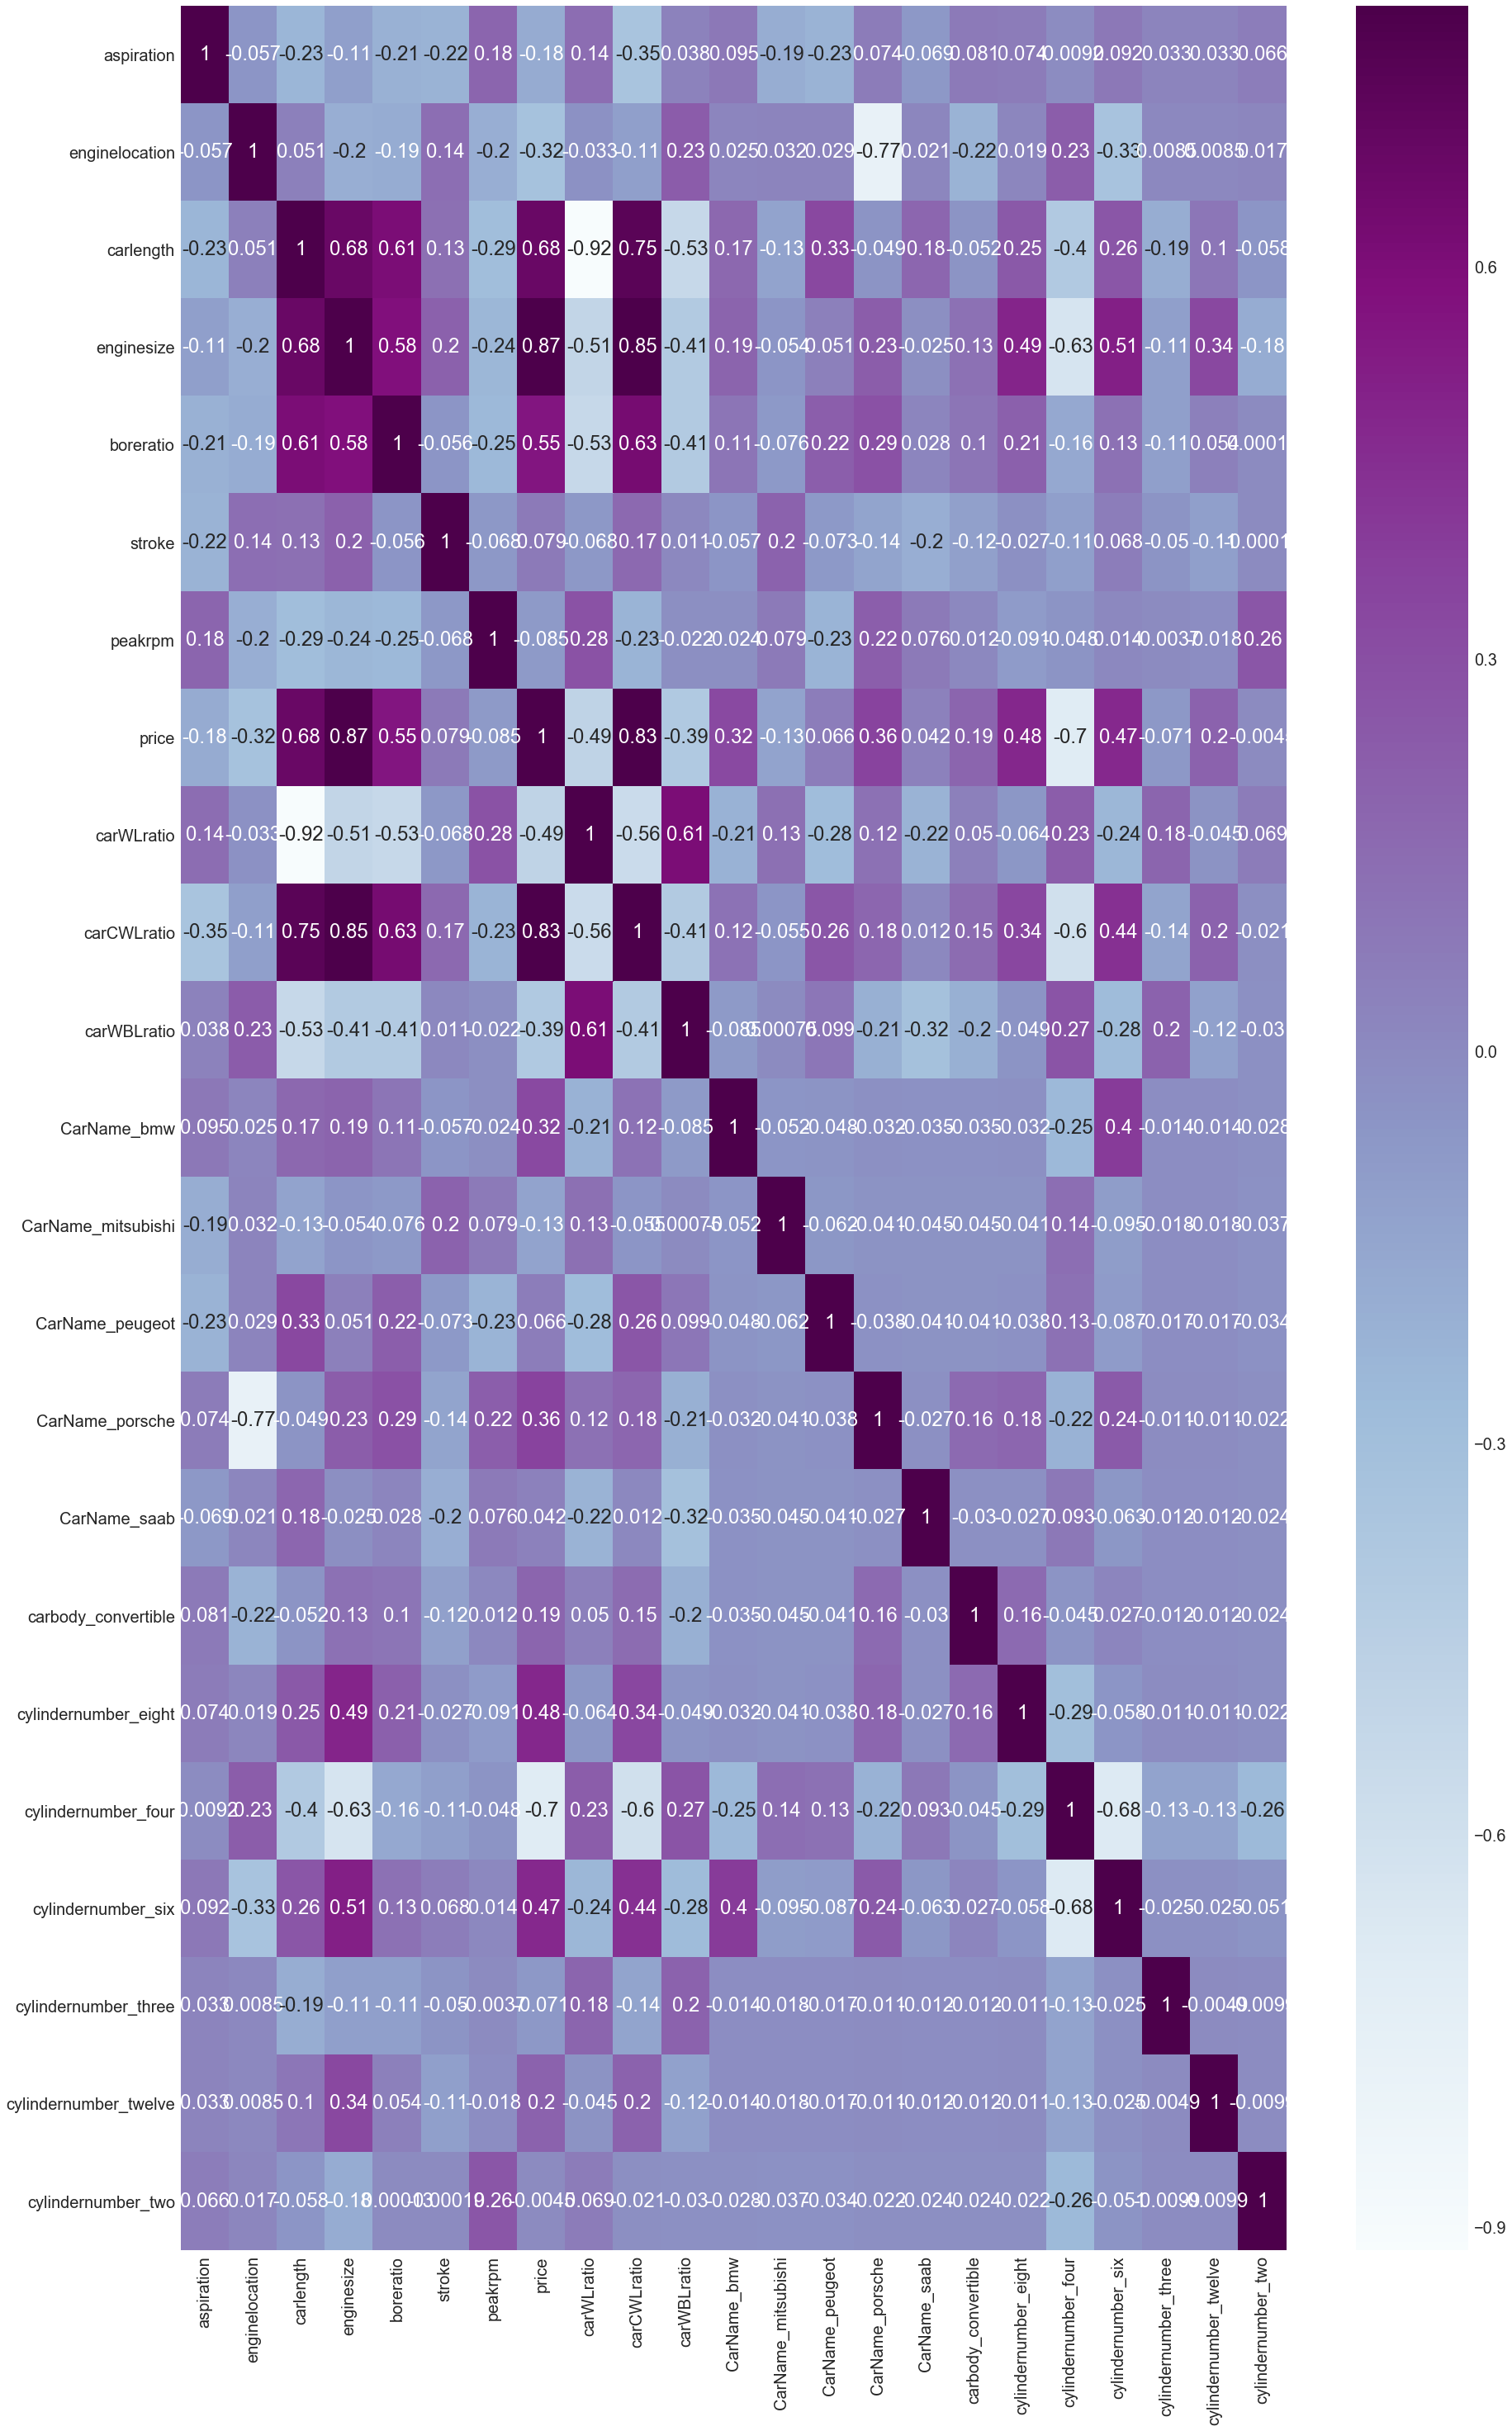

In [51]:
plt.figure(figsize = (30,50))  
sns.heatmap(auto_df.corr(), vmax=.8, annot = True, cmap="BuPu");

<span style="color:Green">carCWLratio has a p-value of 0.088. It is also highly correlated with carlength,enginesize and boreratio. And it has a moderately high VIF of 8.66,so let us drop it.</span>


In [52]:
# drop variable with high p-value, multicollinearity with other variables and high VIF
X_train5 = X_train4.drop('carCWLratio', 1)

In [53]:
# Fifth model - after dropping carCWLratio
model_5 = sm.OLS(y_train,X_train5).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     127.4
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           3.40e-72
Time:                        20:16:19   Log-Likelihood:                 256.75
No. Observations:                 143   AIC:                            -469.5
Df Residuals:                     121   BIC:                            -404.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [54]:
# drop the variable from the dataframe
auto_df.drop('carCWLratio', axis =1, inplace = True)

In [55]:
# Calculating Vif value
calculate_vif(in_data=auto_df, target_col="price")

,Var,Vif
1,enginelocation,32.30
16,cylindernumber_four,30.86
2,carlength,23.56
3,enginesize,18.11
7,carWLratio,16.10
0,aspiration,7.89
17,cylindernumber_six,5.84
4,boreratio,4.38
15,cylindernumber_eight,3.70
19,cylindernumber_twelve,2.88


<span style="color:Green">There is one clear variable with high p-value of 0.078, which is CarName_saab. Let us drop it.</span>


In [56]:
# Drop variable with high p-value
X_train6 = X_train5.drop('CarName_saab', 1)

In [57]:
# Sixth model - after dropping CarName_saab
model_6 = sm.OLS(y_train,X_train6).fit()
print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.38e-72
Time:                        20:16:21   Log-Likelihood:                 254.90
No. Observations:                 143   AIC:                            -467.8
Df Residuals:                     122   BIC:                            -405.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [58]:
# drop the variable from the dataframe
auto_df.drop('CarName_saab', axis =1, inplace = True)

In [59]:
# Find Vif value
calculate_vif(in_data=auto_df, target_col="price")

,Var,Vif
1,enginelocation,31.99
15,cylindernumber_four,28.92
2,carlength,22.96
3,enginesize,17.77
7,carWLratio,15.94
0,aspiration,7.76
16,cylindernumber_six,5.83
4,boreratio,4.10
14,cylindernumber_eight,3.67
18,cylindernumber_twelve,2.81


<span style="color:Green">All p-values are below 0.05 but there are some variables with high VIF. So use RFE to drop some variables.</span>



In [60]:
# Use RFE to retain 10 variables in the model
lm = LinearRegression()
rfe = RFE(lm,10)             
rfe = rfe.fit(X_train6, y_train)
# print the results of RFE - boolean and ranking
print(rfe.support_)           
print(rfe.ranking_)

[False False  True  True  True  True  True False  True False  True False
 False False False False False  True False  True  True]
[12  8  1  1  1  1  1 11  1  7  1  9  6  3  5  2 10  1  4  1  1]


In [61]:
# Note the columns dropped in a series
col_dropped1 = X_train6.columns[~rfe.support_]
X_train7 = X_train6.drop(col_dropped1,1)
X_train7.columns

Index(['enginelocation', 'carlength', 'enginesize', 'boreratio', 'stroke',
       'carWLratio', 'CarName_bmw', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [62]:
# drop constant from the series
col_dropped2 = col_dropped1.drop('const',1)
col_dropped2

Index(['aspiration', 'peakrpm', 'carWBLratio', 'CarName_mitsubishi',
       'CarName_peugeot', 'CarName_porsche', 'carbody_convertible',
       'cylindernumber_eight', 'cylindernumber_four', 'cylindernumber_three'],
      dtype='object')

In [63]:
# drop columns filtered by RFE from the dataframe
auto_df.drop(col_dropped2, axis =1, inplace = True)
auto_df.head()

,enginelocation,carlength,enginesize,boreratio,stroke,price,carWLratio,CarName_bmw,cylindernumber_six,cylindernumber_twelve,cylindernumber_two
0,1,-0.078347,0.011671,0.100174,-0.274007,0.005419,-0.001156,0,0,0,0
1,1,-0.078347,0.011671,0.100174,-0.274007,0.080018,-0.001156,0,0,0,0
2,1,-0.042526,0.094689,-0.464111,0.102184,0.080018,0.027963,0,1,0,0
3,1,0.038071,-0.067575,-0.099826,0.068850,0.016714,-0.050952,0,0,0,0
4,1,0.038071,0.034312,-0.099826,0.068850,0.103602,-0.039398,0,0,0,0


In [64]:
# Seventh model
X_train7 = sm.add_constant(X_train7)
model_7 = sm.OLS(y_train,X_train7).fit()
print(model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     142.8
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.04e-65
Time:                        20:16:23   Log-Likelihood:                 208.83
No. Observations:                 143   AIC:                            -395.7
Df Residuals:                     132   BIC:                            -363.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.40

In [65]:
# get VIF for the updated dataframe
calculate_vif(in_data=auto_df, target_col="price")

,Var,Vif
1,carlength,12.85
5,carWLratio,8.96
2,enginesize,5.95
7,cylindernumber_six,2.30
3,boreratio,2.19
8,cylindernumber_twelve,1.53
6,CarName_bmw,1.29
0,enginelocation,1.26
4,stroke,1.24
9,cylindernumber_two,1.17


<span style="color:Green"> Also its coefficient is high at 0.78. And it may be a driving factor to determine the price. So lets plot the correlation matrix to see if it is correlated with other variables.</span>



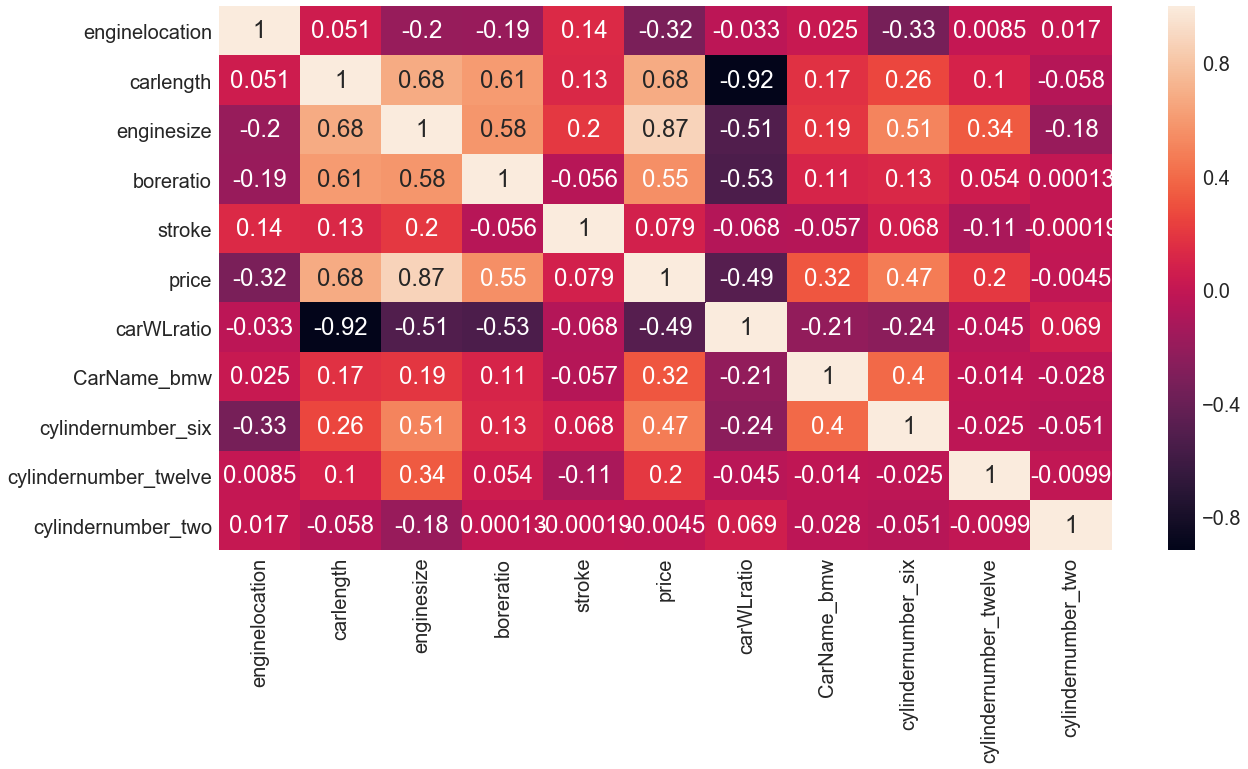

In [66]:
plt.figure(figsize = (20,10))  
sns.heatmap(auto_df.corr(),annot = True)

<span style="color:Green"> As we had estimated, carLength is a potential driving factor (well correlated with price at 0.68). It is highly (negatively) correlated with carWLratio. So let us drop carWLratio.</span>



In [67]:
# Drop variable with high correlation
X_train8 = X_train7.drop('carWLratio', 1)

In [68]:
# Eighth model - after dropping carWLratio
X_train8 = sm.add_constant(X_train8)
model_8 = sm.OLS(y_train,X_train8).fit()
print(model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     120.1
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           2.09e-59
Time:                        20:16:29   Log-Likelihood:                 190.36
No. Observations:                 143   AIC:                            -360.7
Df Residuals:                     133   BIC:                            -331.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

In [69]:
# find VIF for updated dataframe
auto_df.drop('carWLratio', axis =1, inplace = True)
calculate_vif(in_data=auto_df, target_col="price")

,Var,Vif
2,enginesize,4.49
1,carlength,2.24
3,boreratio,2.13
6,cylindernumber_six,2.12
7,cylindernumber_twelve,1.48
5,CarName_bmw,1.27
4,stroke,1.24
0,enginelocation,1.23
8,cylindernumber_two,1.12


<span style="color:Green"> In this model, the p-value is 0 for all variables and the VIF is < 5. The adjusted R squared and R squared values are high at 0.883 and 0.89. So we can use this model for predicting the price for test dataset. Let us check the heatmap before confirming this model.</span>


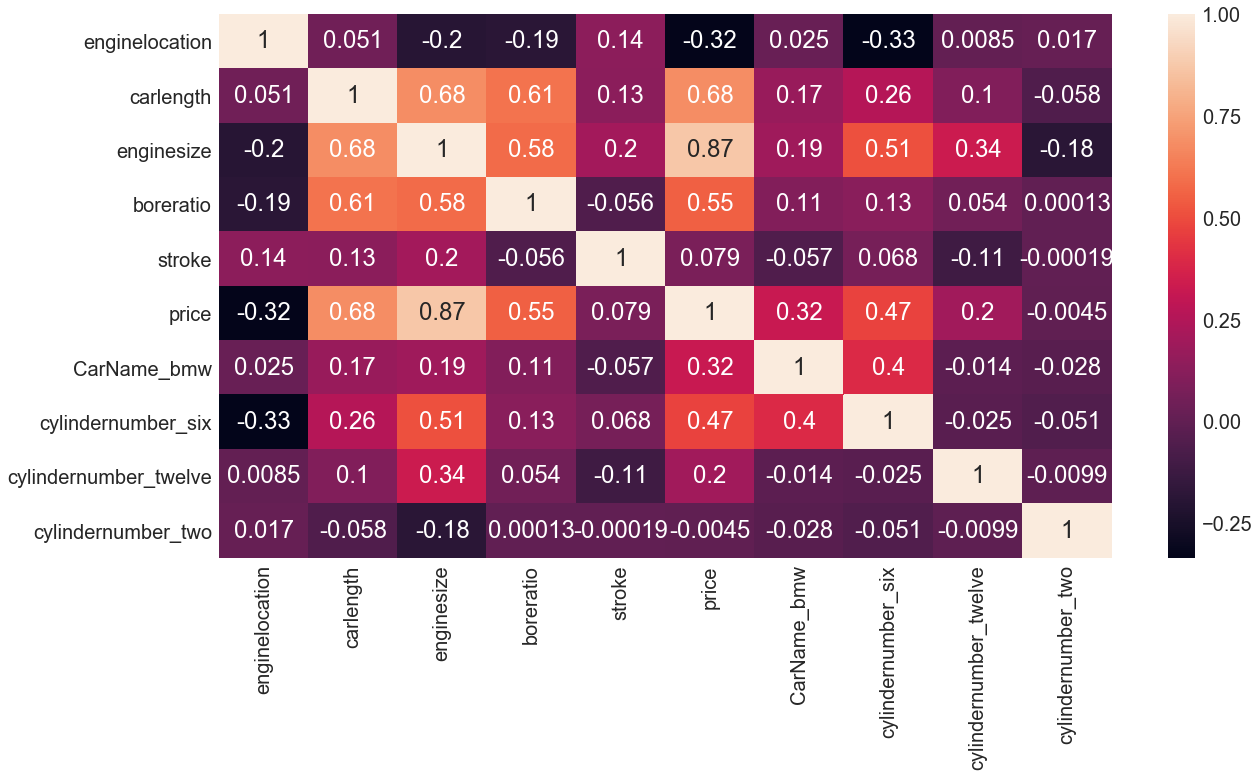

In [70]:
plt.figure(figsize = (20,10))  
sns.heatmap(auto_df.corr(),annot = True)

<span style="color:Green"> We notice that cylindernumber_two has the least correlation price. So let us drop it and see if it impacts the adjusted R squared value.</span>


In [71]:
# Drop variable with least impact on output - cylindernumber_two
X_train9 = X_train8.drop('cylindernumber_two',1)
X_train9 = sm.add_constant(X_train9)
model_9 = sm.OLS(y_train,X_train9).fit()
print(model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     88.35
Date:                Sun, 19 Aug 2018   Prob (F-statistic):           1.19e-49
Time:                        20:16:34   Log-Likelihood:                 163.55
No. Observations:                 143   AIC:                            -309.1
Df Residuals:                     134   BIC:                            -282.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.37

In [72]:
# find VIF for updated dataframe
auto_df.drop('cylindernumber_two', axis =1, inplace = True)
calculate_vif(in_data=auto_df, target_col="price")

,Var,Vif
2,enginesize,4.12
1,carlength,2.23
6,cylindernumber_six,2.07
3,boreratio,2.06
7,cylindernumber_twelve,1.44
5,CarName_bmw,1.27
0,enginelocation,1.23
4,stroke,1.22


<span style="color:Green"> On dropping cylindernumber_two, the R squared and adjusted R squared dipped and p-values went up. So let us revert back to using model_8 for predictions on test dataset.</span>


## Prediction with model

In [73]:
# add constant term to X_test
X_test_m8 = sm.add_constant(X_test)
# drop all variables droppped during the two RFEs
X_test_m8 = X_test_m8.drop(col_dropped2, axis=1)
X_test_m8 = X_test_m8.drop(col_dropped, axis=1)
# drop the variables that we dropped manually
X_test_m8 = X_test_m8.drop(['carWLratio','enginetype_rotor','carCWLratio','CarName_saab','horsepower','hpengsizeratio'], axis=1)

X_test_m8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 10 columns):
const                    62 non-null float64
enginelocation           62 non-null int64
carlength                62 non-null float64
enginesize               62 non-null float64
boreratio                62 non-null float64
stroke                   62 non-null float64
CarName_bmw              62 non-null uint8
cylindernumber_six       62 non-null uint8
cylindernumber_twelve    62 non-null uint8
cylindernumber_two       62 non-null uint8
dtypes: float64(5), int64(1), uint8(4)
memory usage: 3.6 KB


In [74]:
# Predict price on test dataset
y_pred_m8 = model_8.predict(X_test_m8)
y_pred_m8

160   -0.125647
186   -0.084275
59    -0.029077
165   -0.131165
140   -0.134108
64    -0.029077
198    0.029382
75     0.028769
172    0.046497
104    0.111426
200    0.061771
136   -0.004718
111    0.081024
41    -0.077603
73     0.982564
31    -0.209003
156   -0.125647
133   -0.004718
65     0.018551
83     0.063798
195    0.061771
197    0.061771
126    0.515150
118   -0.176354
167    0.046497
101    0.143530
124    0.063798
69     0.269747
11     0.142131
46    -0.052498
         ...   
110    0.129826
201    0.061771
115   -0.007371
174   -0.076135
134    0.245736
169    0.046497
92    -0.150368
173   -0.035792
74     0.935382
3     -0.069974
157   -0.125647
81    -0.042791
32    -0.232111
99    -0.049870
26    -0.176354
88    -0.078992
184   -0.118724
187   -0.118724
52    -0.168451
168    0.046497
164   -0.118643
188   -0.084275
7      0.120161
158   -0.103278
123   -0.038122
28    -0.036501
29     0.058642
182   -0.118724
40    -0.077603
128    0.515150
Length: 62, dtype: float

Text(0,0.5,'Car Price')

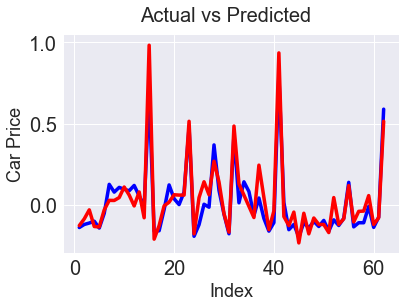

In [75]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     
plt.plot(c,y_pred_m8, color="red",  linewidth=3.5, linestyle="-")  
fig.suptitle('Actual vs Predicted', fontsize=20)             
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Car Price', fontsize=18) 

<span style="color:Green"> The actual and predicted car prices closely match. So the model predicts teh car price to a high degree of accuracy.</span>



Text(0,0.5,'y_pred')

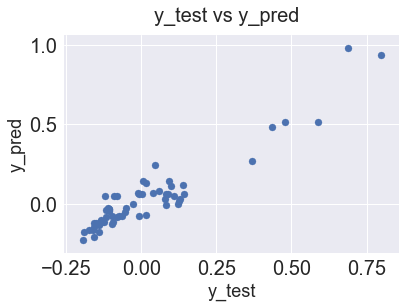

In [76]:
#Plot y_test and y_pred to see the spread
fig = plt.figure()
plt.scatter(y_test,y_pred_m8)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=18)     

Text(0,0.5,'ytest-ypred')

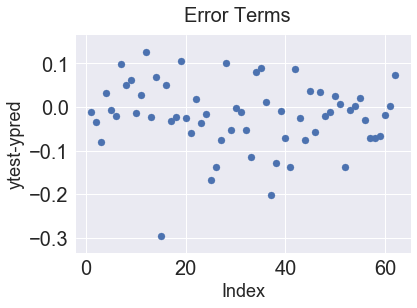

In [77]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]

plt.scatter(c,y_test-y_pred_m8)

fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=18)                

<span style="color:Green"> The error term has a random distribution which means that the residuals are neither systematically high nor low. So, the residuals should be centered on zero throughout the range of fitted values. In other words, the model is correct on average for all fitted values.</span>


C:\Users\bindus\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

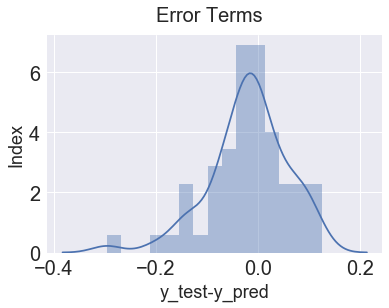

In [78]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m8),bins=15)
fig.suptitle('Error Terms', fontsize=20)                  
plt.xlabel('y_test-y_pred', fontsize=18)                  
plt.ylabel('Index', fontsize=18)  

<span style="color:Green"> Random errors are assumed to produce residuals that are normally distributed. Therefore, the residuals should fall in a symmetrical pattern and have a constant spread throughout the range. So the normal distribution of error term is correct.</span>


In [79]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m8)
r_squared = r2_score(y_test, y_pred_m8)

In [80]:
# calculate mean squared error and r squared value for test data.
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.006375836401256158
r_square_value : 0.8522659199160406


<span style="color:Green"> The R squared value for test data closely matches the R squared value for training data.</span>


In [81]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m8)))

RMSE : 0.07984883468940644


In [82]:
y_train_m8 = model_8.predict(X_train8)
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_train, y_train_m8)))

RMSE : 0.063918034473041


<span style="color:Green"> The RMSE for test and training data are low and match well.</span>


## <span style="color:Orange">Key Driving factors that determine car price


<span style="color:Red">The driving factors are (in the order of their correlation with price as seen in the heatmap): 


1) <span style="color:Blue">**enginesize** 

2) <span style="color:Blue">**carlength** 

3) <span style="color:Blue">**boreratio** 

4) <span style="color:Blue">**cylindernumber_six** 

5) <span style="color:Blue">**CarName_bmw** 

6) <span style="color:Blue">**enginelocation** 

7) <span style="color:Blue">**cylindernumber_twelve** 

8) <span style="color:Blue">**cylindernumber_two** 